See the video for understanding --> C:\github\ml-classification\audio_recordings

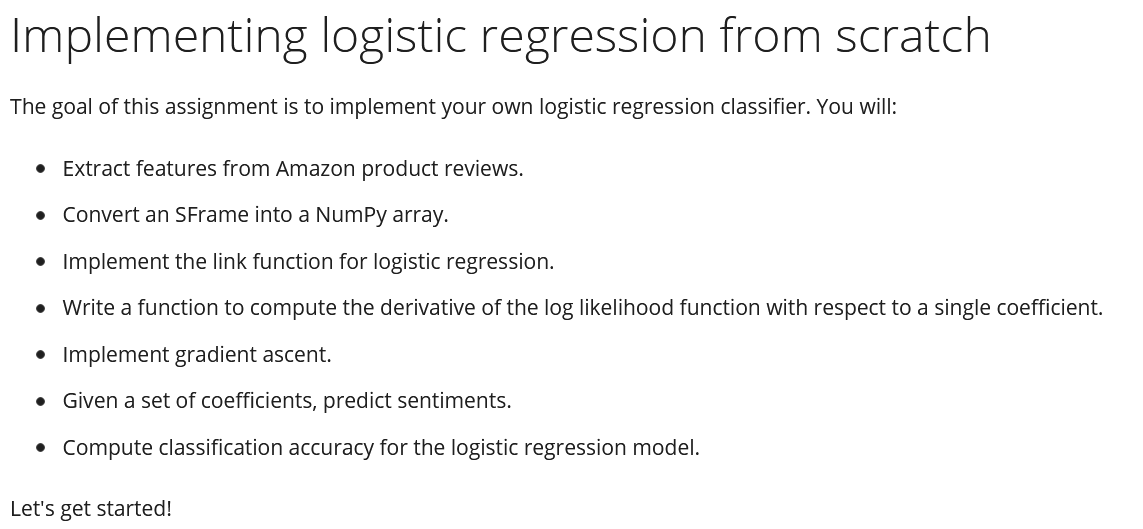

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json
import string

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

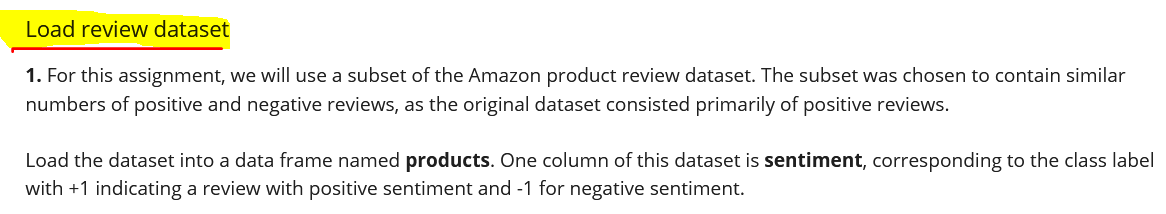

In [2]:
products = pd.read_csv('../data_sets/amazon_baby_subset.csv')
products.head()

name  \
0  Stop Pacifier Sucking without tears with Thumb...   
1    Nature's Lullabies Second Year Sticker Calendar   
2    Nature's Lullabies Second Year Sticker Calendar   
3                        Lamaze Peekaboo, I Love You   
4  SoftPlay Peek-A-Boo Where's Elmo A Children's ...   

                                              review  rating  sentiment  
0  All of my kids have cried non-stop when I trie...       5          1  
1  We wanted to get something to keep track of ou...       5          1  
2  My daughter had her 1st baby over a year ago. ...       5          1  
3  One of baby's first and favorite books, and it...       4          1  
4  Very cute interactive book! My son loves this ...       5          1

In [3]:
products.isnull().sum()

name          90
review       241
rating         0
sentiment      0
dtype: int64

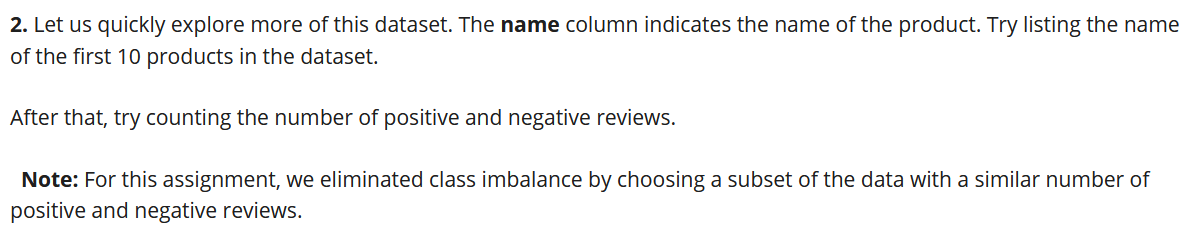

In [4]:
# Name of first 10 products in the data-set
products['name'].head(10)

0    Stop Pacifier Sucking without tears with Thumb...
1      Nature's Lullabies Second Year Sticker Calendar
2      Nature's Lullabies Second Year Sticker Calendar
3                          Lamaze Peekaboo, I Love You
4    SoftPlay Peek-A-Boo Where's Elmo A Children's ...
5                            Our Baby Girl Memory Book
6    Hunnt&reg; Falling Flowers and Birds Kids Nurs...
7    Blessed By Pope Benedict XVI Divine Mercy Full...
8    Cloth Diaper Pins Stainless Steel Traditional ...
9    Cloth Diaper Pins Stainless Steel Traditional ...
Name: name, dtype: object

In [5]:
# Try counting the number of +ve and -ve reviews
positive_count = 0
negative_count = 0
for i in products['sentiment']:
    if i==1:  positive_count+=1
    else:     negative_count+=1
print('Count of Positive reviews : ',positive_count)
print('Count of Negative reviews : ',negative_count)

Count of Positive reviews :  26579
Count of Negative reviews :  26493


In [6]:
print('Count of Positive reviews : ',len(products[products['sentiment']==1]))
print('Count of Negative reviews : ',len(products[products['sentiment']==-1]))

Count of Positive reviews :  26579
Count of Negative reviews :  26493


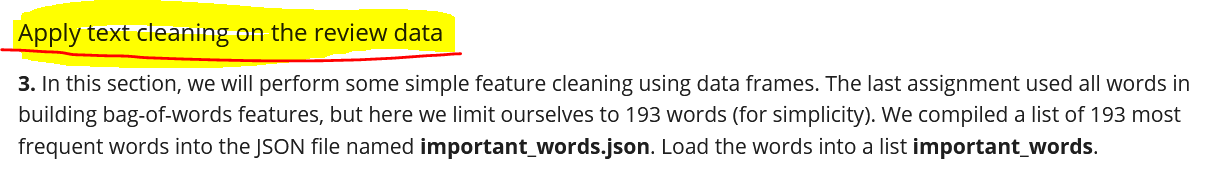

In [7]:
with open('../data_sets/important_words.json','r') as f:
    important_words = json.load(f)

print(important_words)

['baby', 'one', 'great', 'love', 'use', 'would', 'like', 'easy', 'little', 'seat', 'old', 'well', 'get', 'also', 'really', 'son', 'time', 'bought', 'product', 'good', 'daughter', 'much', 'loves', 'stroller', 'put', 'months', 'car', 'still', 'back', 'used', 'recommend', 'first', 'even', 'perfect', 'nice', 'bag', 'two', 'using', 'got', 'fit', 'around', 'diaper', 'enough', 'month', 'price', 'go', 'could', 'soft', 'since', 'buy', 'room', 'works', 'made', 'child', 'keep', 'size', 'small', 'need', 'year', 'big', 'make', 'take', 'easily', 'think', 'crib', 'clean', 'way', 'quality', 'thing', 'better', 'without', 'set', 'new', 'every', 'cute', 'best', 'bottles', 'work', 'purchased', 'right', 'lot', 'side', 'happy', 'comfortable', 'toy', 'able', 'kids', 'bit', 'night', 'long', 'fits', 'see', 'us', 'another', 'play', 'day', 'money', 'monitor', 'tried', 'thought', 'never', 'item', 'hard', 'plastic', 'however', 'disappointed', 'reviews', 'something', 'going', 'pump', 'bottle', 'cup', 'waste', 'retu

In [8]:
print("Number of important words : ",len(important_words))

Number of important words :  193


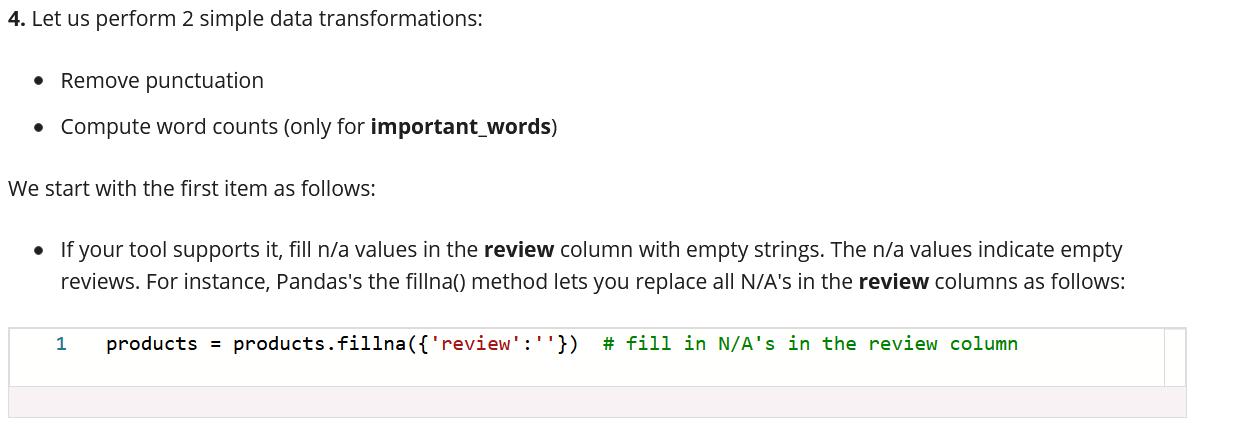

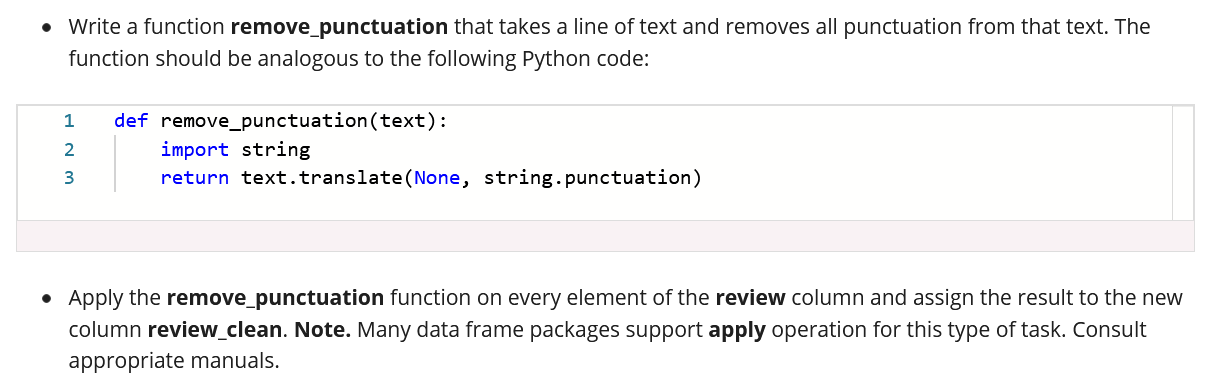

In [11]:
print('Before')
print(products.isnull().sum())

# Replacing the NaN values with None --> For removing the punctuations
products = products.fillna({'review':''})

print('\nAfter')
print(products.isnull().sum())

Before
name          90
review       241
rating         0
sentiment      0
dtype: int64

After
name         90
review        0
rating        0
sentiment     0
dtype: int64


In [12]:
def remove_punctuation(text):
    ## if the above punctuations are present it will be removed and replaced with NaN values
    mapping = str.maketrans(' ' , ' ' , string.punctuation)
    return text.translate(mapping)

In [13]:
products['review_clean'] = products['review'].apply(remove_punctuation)
products.head()

name  \
0  Stop Pacifier Sucking without tears with Thumb...   
1    Nature's Lullabies Second Year Sticker Calendar   
2    Nature's Lullabies Second Year Sticker Calendar   
3                        Lamaze Peekaboo, I Love You   
4  SoftPlay Peek-A-Boo Where's Elmo A Children's ...   

                                              review  rating  sentiment  \
0  All of my kids have cried non-stop when I trie...       5          1   
1  We wanted to get something to keep track of ou...       5          1   
2  My daughter had her 1st baby over a year ago. ...       5          1   
3  One of baby's first and favorite books, and it...       4          1   
4  Very cute interactive book! My son loves this ...       5          1   

                                        review_clean  
0  All of my kids have cried nonstop when I tried...  
1  We wanted to get something to keep track of ou...  
2  My daughter had her 1st baby over a year ago S...  
3  One of babys first and favorite books and it i...  
4  Very cute interactive book My son loves this b...

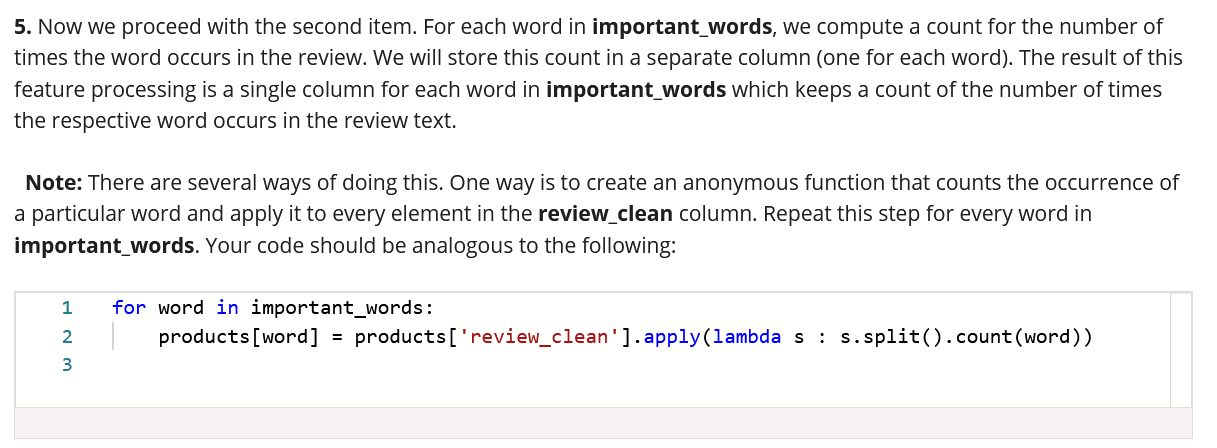

In [14]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [15]:
products.head()

name  \
0  Stop Pacifier Sucking without tears with Thumb...   
1    Nature's Lullabies Second Year Sticker Calendar   
2    Nature's Lullabies Second Year Sticker Calendar   
3                        Lamaze Peekaboo, I Love You   
4  SoftPlay Peek-A-Boo Where's Elmo A Children's ...   

                                              review  rating  sentiment  \
0  All of my kids have cried non-stop when I trie...       5          1   
1  We wanted to get something to keep track of ou...       5          1   
2  My daughter had her 1st baby over a year ago. ...       5          1   
3  One of baby's first and favorite books, and it...       4          1   
4  Very cute interactive book! My son loves this ...       5          1   

                                        review_clean  baby  one  great  love  \
0  All of my kids have cried nonstop when I tried...     0    0      1     0   
1  We wanted to get something to keep track of ou...     0    0      0     0   
2  My daughter had her 1st baby over a year ago S...     1    0      0     0   
3  One of babys first and favorite books and it i...     0    0      0     0   
4  Very cute interactive book My son loves this b...     0    0      1     0   

   use  ...  seems  picture  completely  wish  buying  babies  won  tub  \
0    0  ...      0        0           0     0       0       0    0    0   
1    0  ...      0        0           0     0       0       0    0    0   
2    0  ...      0        0           0     0       0       0    0    0   
3    0  ...      0        0           0     0       0       0    0    0   
4    0  ...      0        0           0     0       0       1    0    0   

   almost  either  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 198 columns]

In [16]:
print(important_words)

['baby', 'one', 'great', 'love', 'use', 'would', 'like', 'easy', 'little', 'seat', 'old', 'well', 'get', 'also', 'really', 'son', 'time', 'bought', 'product', 'good', 'daughter', 'much', 'loves', 'stroller', 'put', 'months', 'car', 'still', 'back', 'used', 'recommend', 'first', 'even', 'perfect', 'nice', 'bag', 'two', 'using', 'got', 'fit', 'around', 'diaper', 'enough', 'month', 'price', 'go', 'could', 'soft', 'since', 'buy', 'room', 'works', 'made', 'child', 'keep', 'size', 'small', 'need', 'year', 'big', 'make', 'take', 'easily', 'think', 'crib', 'clean', 'way', 'quality', 'thing', 'better', 'without', 'set', 'new', 'every', 'cute', 'best', 'bottles', 'work', 'purchased', 'right', 'lot', 'side', 'happy', 'comfortable', 'toy', 'able', 'kids', 'bit', 'night', 'long', 'fits', 'see', 'us', 'another', 'play', 'day', 'money', 'monitor', 'tried', 'thought', 'never', 'item', 'hard', 'plastic', 'however', 'disappointed', 'reviews', 'something', 'going', 'pump', 'bottle', 'cup', 'waste', 'retu

Now we proceed with *Step 2*. For each word in **important_words**, we compute a count for the number of times the word occurs in the review. We will store this count in a separate column (one for each word). The result of this feature processing is a single column for each word in **important_words** which keeps a count of the number of times the respective word occurs in the review text.


**Note:** There are several ways of doing this. In this assignment, we use the built-in *count* function for Python lists. Each review string is first split into individual words and the number of occurances of a given word is counted.

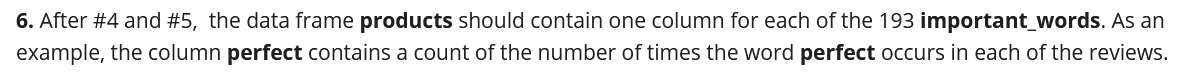

In [17]:
print(products['perfect'])

0        0
1        0
2        0
3        1
4        0
        ..
53067    0
53068    0
53069    0
53070    0
53071    0
Name: perfect, Length: 53072, dtype: int64


In [18]:
## From the above it is clear that
## 1st review --> No perfect
## 2nd review --> No perfect
## 3rd review --> No perfect
## 4th review --> 1 perfect word

## 53071th review --> No perfect

In [19]:
print("Number of reviews with")
print("No perfect word : ", len(products[products['perfect'] == 0]))
print("1 perfect word  : ",len(products[products['perfect'] == 1]))
print("2 perfect words : ",len(products[products['perfect'] == 2]))
print("3 perfect words : ",len(products[products['perfect'] == 3]))
print("4 perfect words : ",len(products[products['perfect'] == 4]))
print("5 perfect words : ",len(products[products['perfect'] == 5]))
print("6 perfect words : ",len(products[products['perfect'] == 6]))

Number of reviews with
No perfect word :  50117
1 perfect word  :  2731
2 perfect words :  202
3 perfect words :  16
4 perfect words :  6
5 perfect words :  0
6 perfect words :  0


In [20]:
## Each review will have exactly 4 'perfect' words
for i in products[products['perfect'] == 4]['review']:
    print("\n\n",i)



 I don't think there is a "perfect" double stroller out there for $300.  There are single strollers that cost way more than this one and those are not perfect either.  So I'm giving it 4 stars because it can be improved by the maker.  The child trays are small.  The sun shades are small.  But I have one of those single canopy sunshade and it works great with this stroller since it's not too wide.  The stickers for the word "Aria" were coming off but I put it back and it seemed to stay.  Other than that, the size is perfect.  My 2 year old and 6 months old daughters are very happy riding in this stroller.  Some peoople said the weight differences could throw it off balance and might cause it hard to turn or move around. But I don't find that is a problem.  It's light and very easy to move around.  Both trays does swing open individually from the middle out.  It has separate seat reclining which is perfect.  The closing and opening are very easy to use. I have a Prius and this stroller

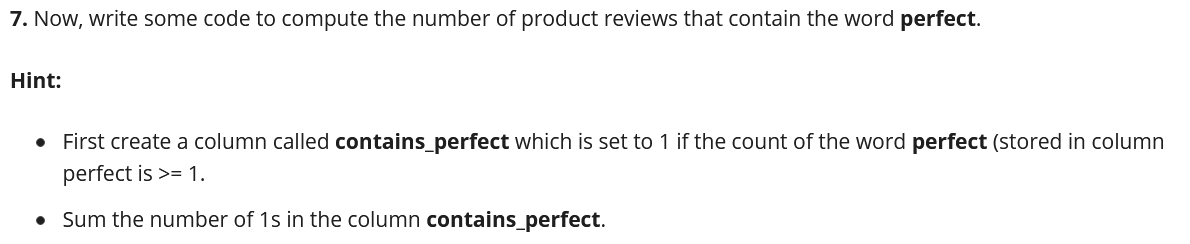.

In [21]:
products['contains_perfect'] = products['perfect'].apply(lambda s : 1 if s>=1 else 0)
products['contains_perfect'].head()

0    0
1    0
2    0
3    1
4    0
Name: contains_perfect, dtype: int64

In [22]:
sum(products['contains_perfect'])

2955

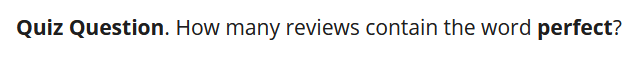

In [21]:
print('The number of reviews containing the word "perfect" ',
      sum(products['contains_perfect']))

The number of reviews containing the word "perfect"  2955


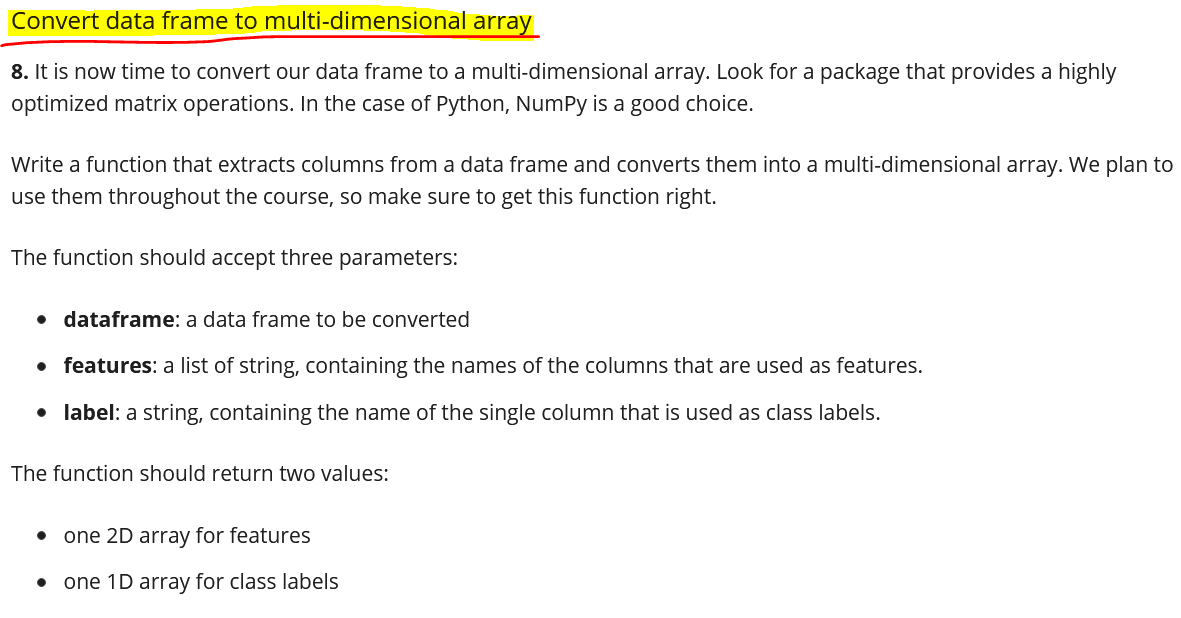

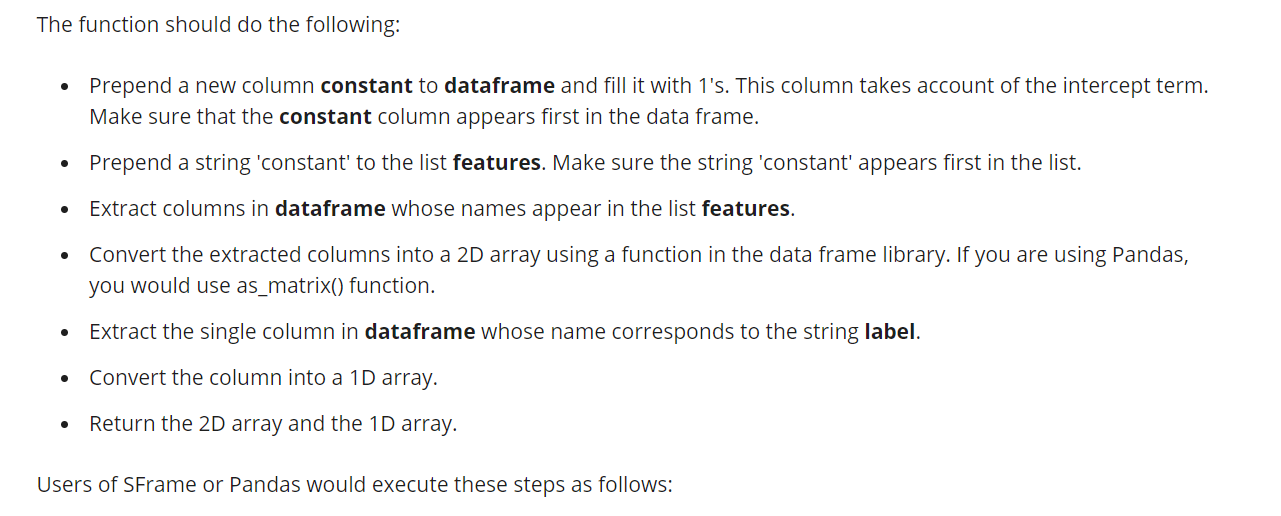

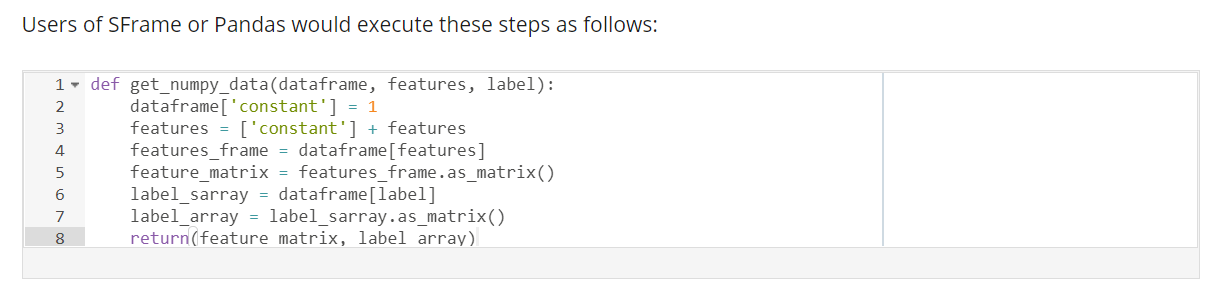

In [23]:
def get_numpy_data(data_frame, features, label):
##                products , important_words , 'sentiment'
    
                            ## INDEPENDENT FEATURES
# Prepend a new column constant to dataframe and fill it with 1's.This column takes account of the intercept term. 
# Make sure that the constant column appears first in the data frame.
# constant = intercept
    data_frame['intercept'] = 1
    
## Prepend a string 'constant' to the list features. 
## Make sure the string 'constant' appears first in the list.
    features       = ['intercept'] + features
    
# Extract columns in dataframe whose names appear in the list features.
    features_frame = data_frame[features]
    
## Convert the extracted columns into a 2D array using a function in the data frame library. 
    feature_matrix = features_frame.to_numpy()  
    
                            ## DEPENDENT FEATURES
## Extract the single column in dataframe whose name corresponds to the string label.
    label_array  = data_frame[label]

## Convert the column into a 1D array.
    label_array  = label_array.to_numpy()  
    
## Return the 2D array and the 1D array.
    return(feature_matrix, label_array)
##   2D array for values   1D array for class labels

In [24]:
feature_matrix,sentiment = get_numpy_data(products,important_words,'sentiment')

In [25]:
print("Feature Matrix")
print(feature_matrix)
      
print("\nSentiment")
print(sentiment)

Feature Matrix
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]

Sentiment
[ 1  1  1 ... -1 -1 -1]


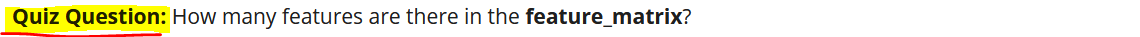

In [26]:
print("Number of features in the feature_matrix : " , len(feature_matrix[0]))

Number of features in the feature_matrix :  194


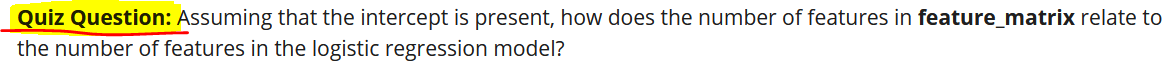

In [27]:
## Number of features in feature_matrix is the same as the number of features in the logistic regression model

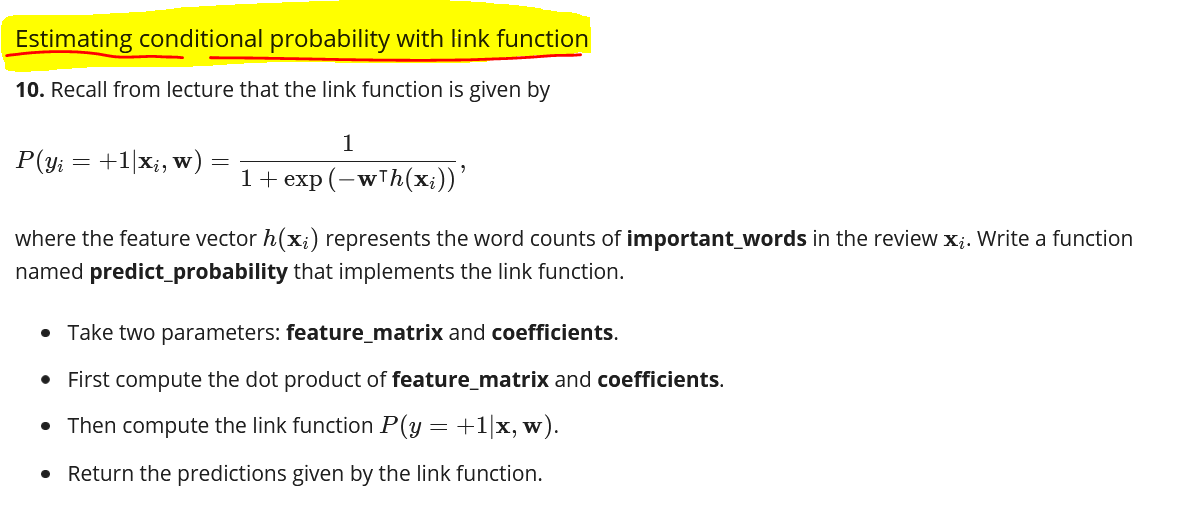

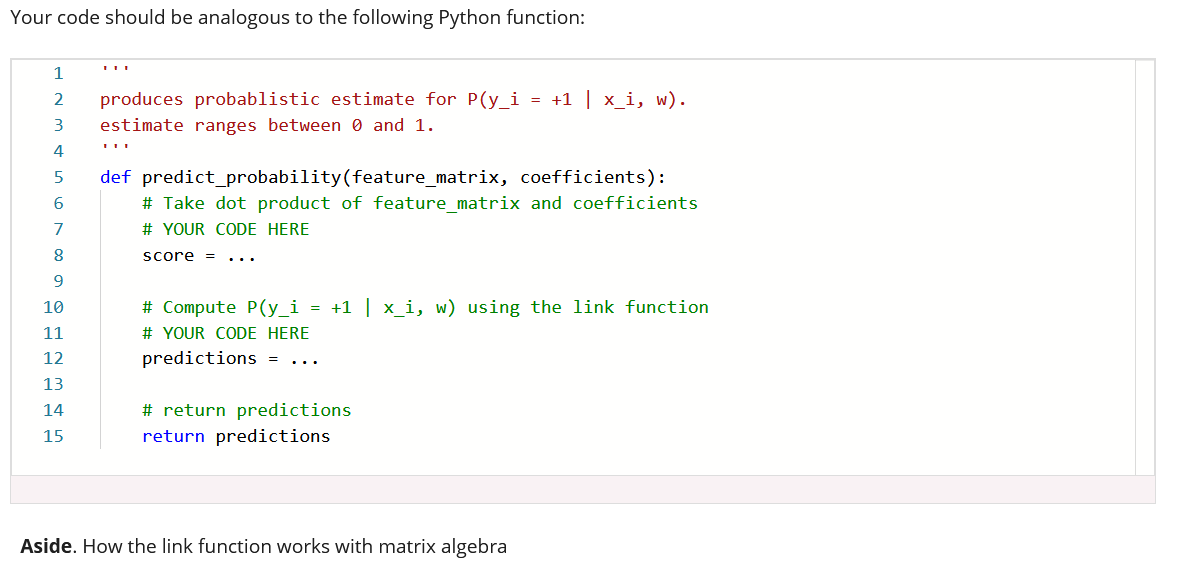

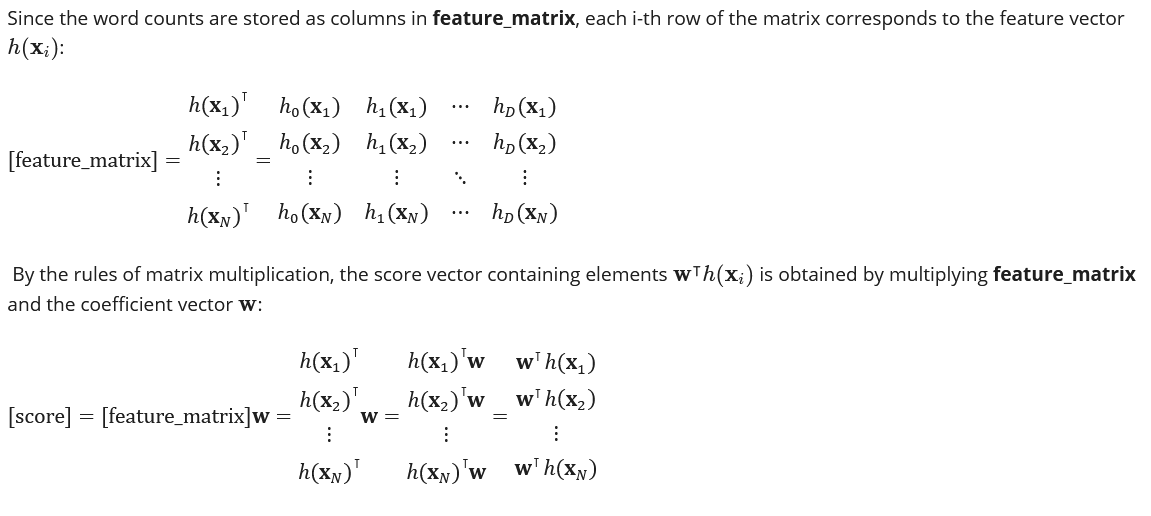

In [31]:
def predict_probability(feature_matrix , coefficients):
    ## First compute the dot product of feature_matrix and coefficients
    score = np.dot(feature_matrix , coefficients)
    
    ## Then compute the link function P(y=+1∣x,w)
    predictions = (1 / (1 + np.exp(-score)))
    
    ## Return the predictions given by the link function.
    return predictions

In [32]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])

print(dummy_feature_matrix)
print(dummy_coefficients)

[[ 1.  2.  3.]
 [ 1. -1. -1.]]
[ 1.  3. -1.]


In [33]:
## coefficient 1 must be multiplied with the 1st column
## coefficient 3 must be multiplied with the 2nd column
## coefficient -1 must be multiplied with the 3rd column

correct_scores      = np.array( [ 1.*(1.) +  2.*(3.) + 3.*(-1.),  
                                  1.*(1.) + -1.*(3.) + -1.*(-1.) ] )

correct_predictions = np.array( [ 1./(1+np.exp(-correct_scores[0])), 
                                  1./(1+np.exp(-correct_scores[1])) ] )

print ('correct_predictions : ', correct_predictions)

correct_predictions :  [0.98201379 0.26894142]


In [34]:
print ('output of predict_probability : ', 
       predict_probability(dummy_feature_matrix, dummy_coefficients))

output of predict_probability :  [0.98201379 0.26894142]


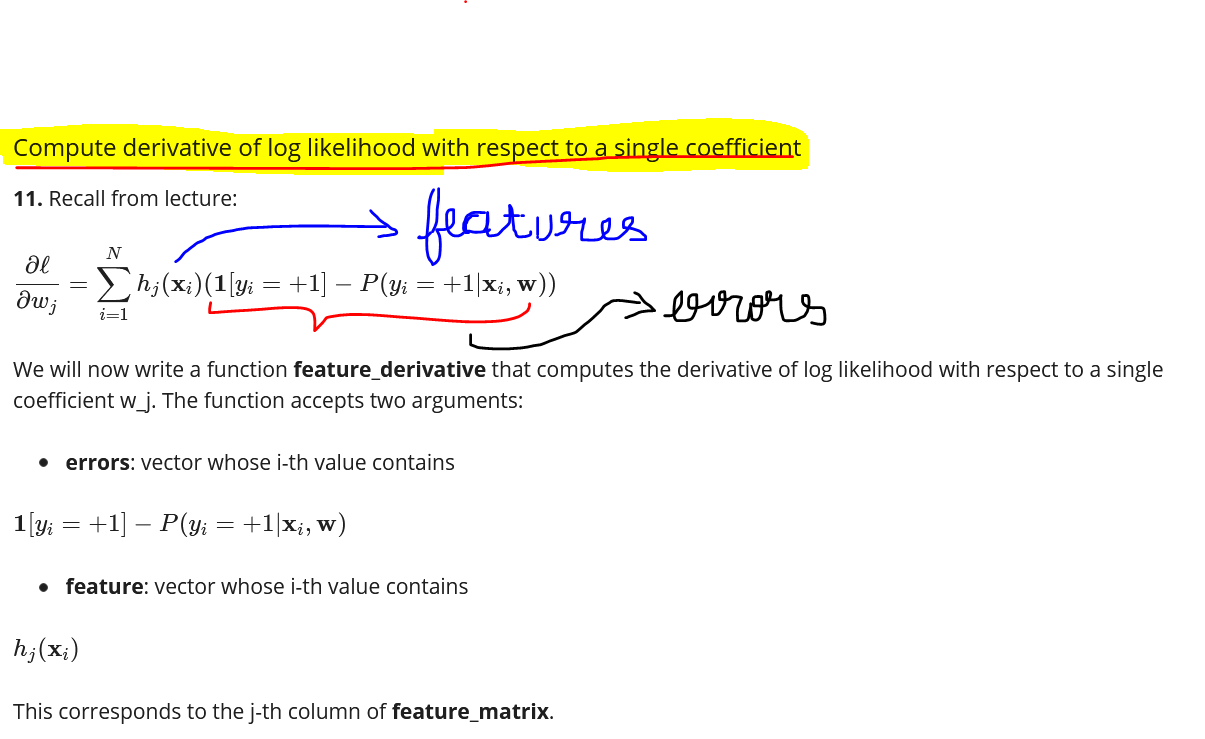

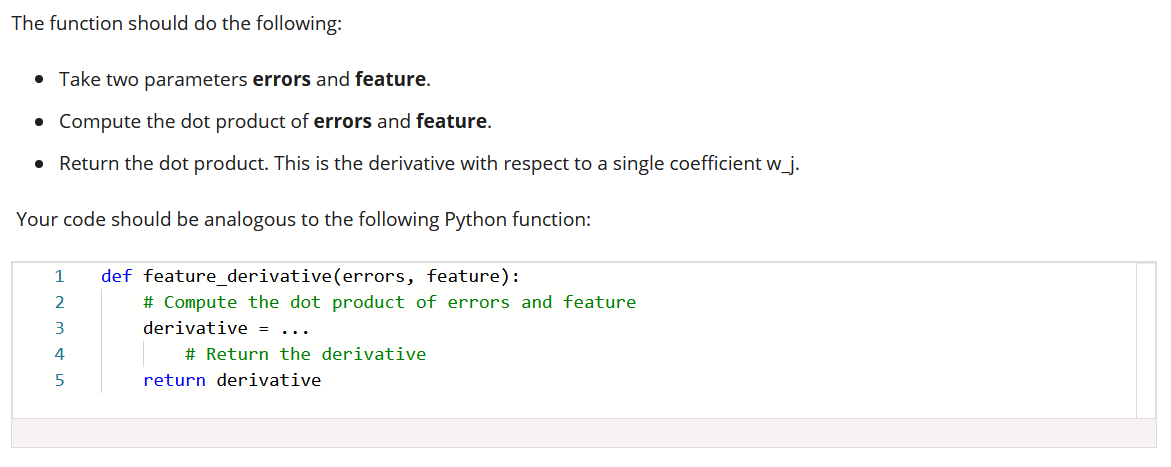

In [35]:
def feature_derivative(errors, feature):
    ## Compute the dot product of errors and feature.
    derivative = np.dot(errors,feature)
    
    # Return the dot product. This is the derivative with respect to a single coefficient w_j.
    return derivative 

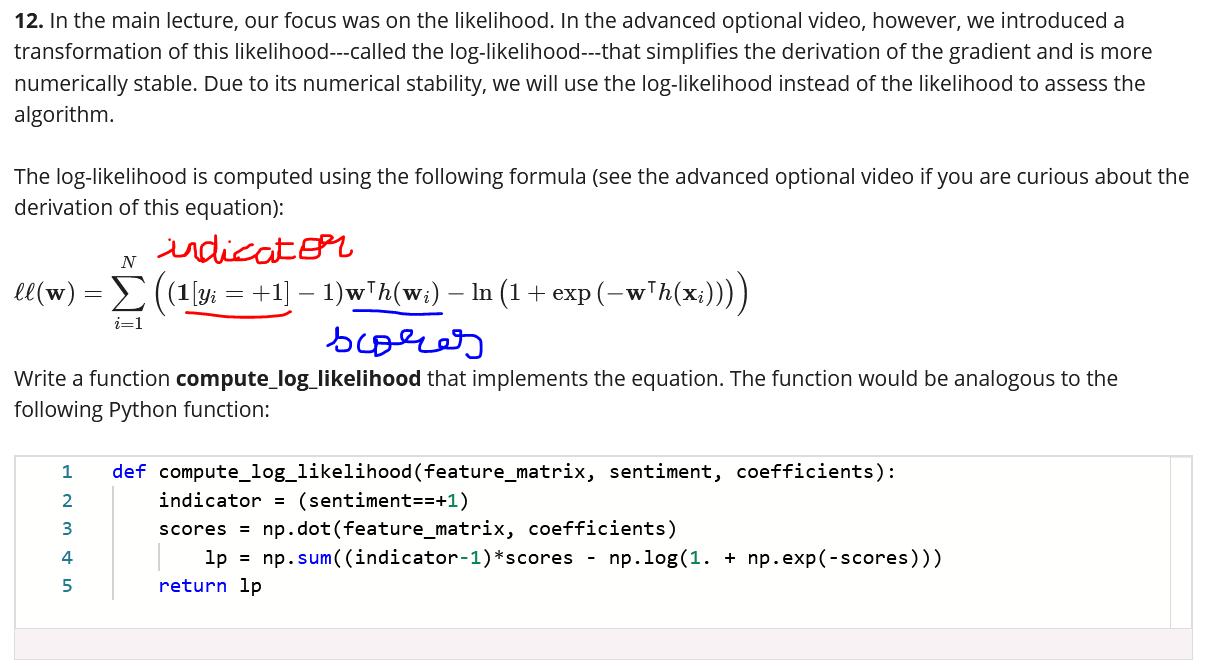

In [39]:
def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix , coefficients)
    lp = np.sum((indicator - 1) * scores - np.log(1. + np.exp(-scores)))
    return lp

In [40]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients   = np.array([1., 3., -1.])
dummy_sentiment      = np.array([-1, 1])

In [41]:
correct_indicators  = np.array([ -1==+1,1==+1 ])
correct_scores      = np.array( [ 1.*(1.) +  2.*(3.) + 3.*(-1.),  
                                  1.*(1.) + -1.*(3.) + -1.*(-1.) ] )

correct_first_term  = np.array([ (correct_indicators[0]-1)*correct_scores[0],  
                                 (correct_indicators[1]-1)*correct_scores[1] ] )

correct_second_term = np.array([ np.log(1. + np.exp(-correct_scores[0])),      
                                 np.log(1. + np.exp(-correct_scores[1])) ] )

correct_ll          = sum( [ correct_first_term[0] - correct_second_term[0], 
                             correct_first_term[1] - correct_second_term[1] ] ) 

In [42]:
print ("correct_log_likelihood           : ", correct_ll)
print ("output of compute_log_likelihood : ", compute_log_likelihood(
    dummy_feature_matrix, dummy_sentiment, dummy_coefficients))

correct_log_likelihood           :  -5.331411615436032
output of compute_log_likelihood :  -5.331411615436032


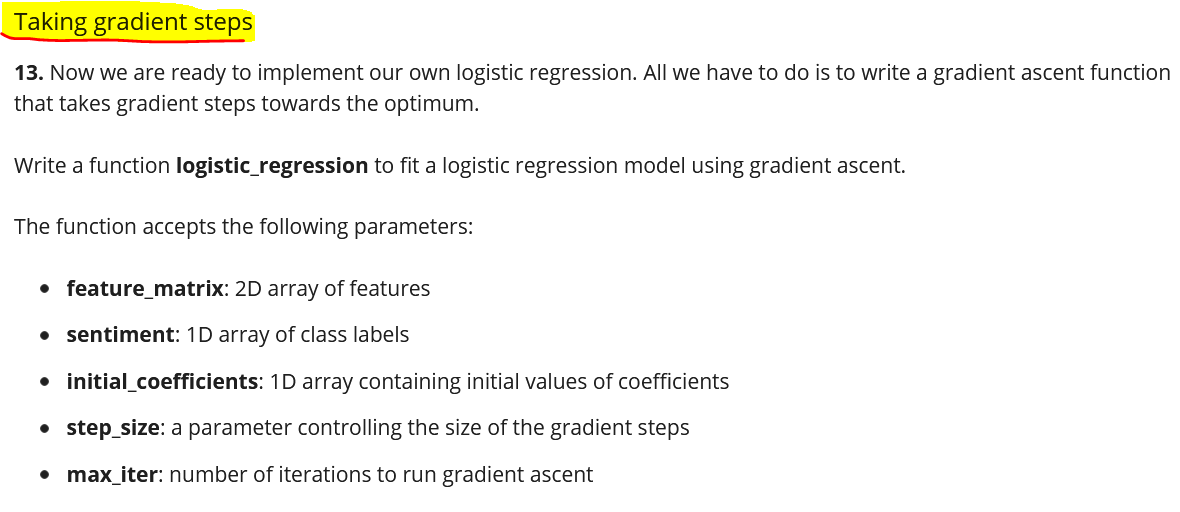

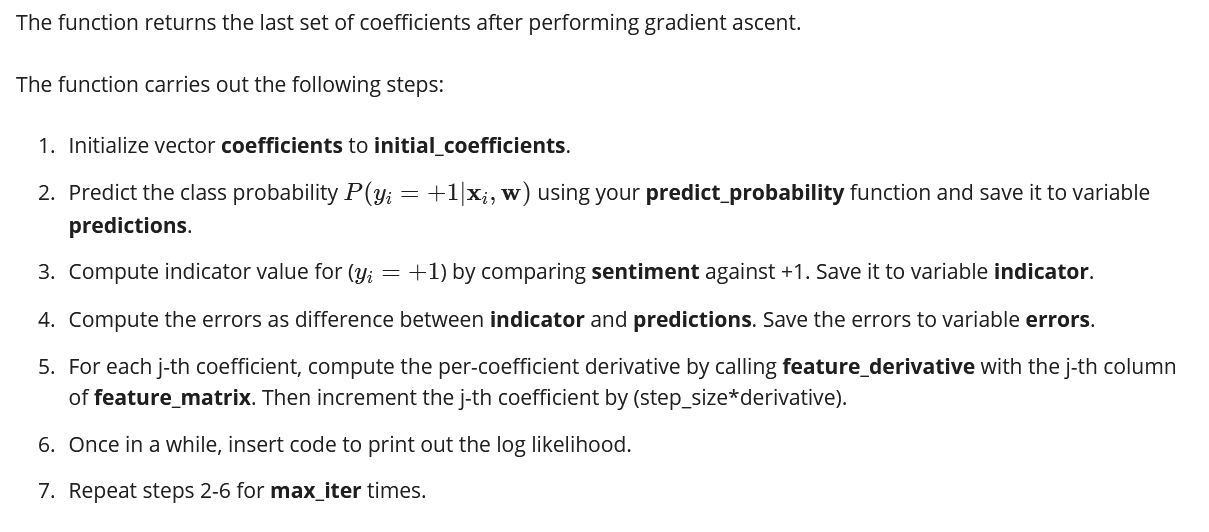

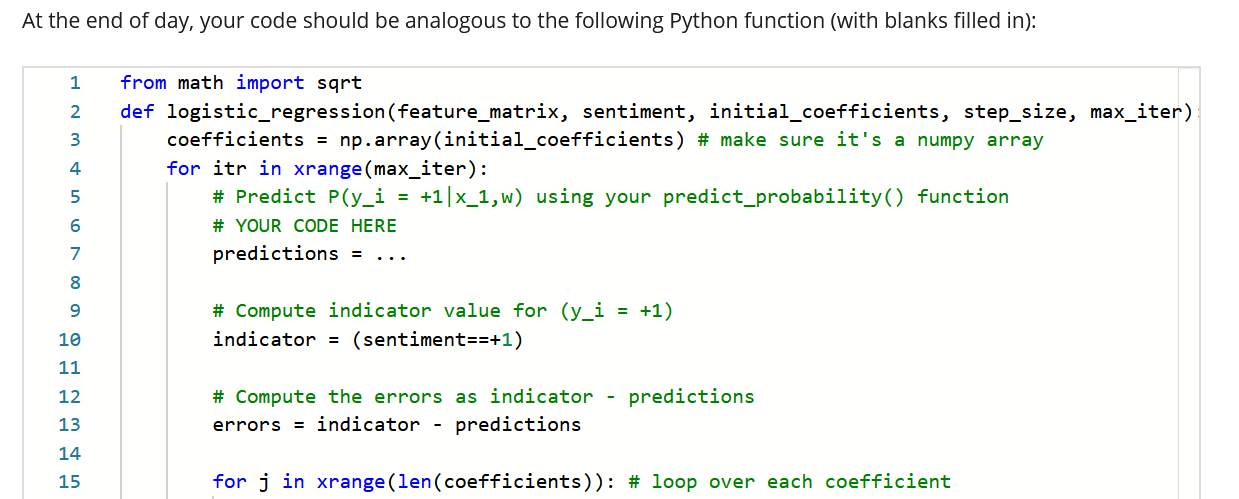

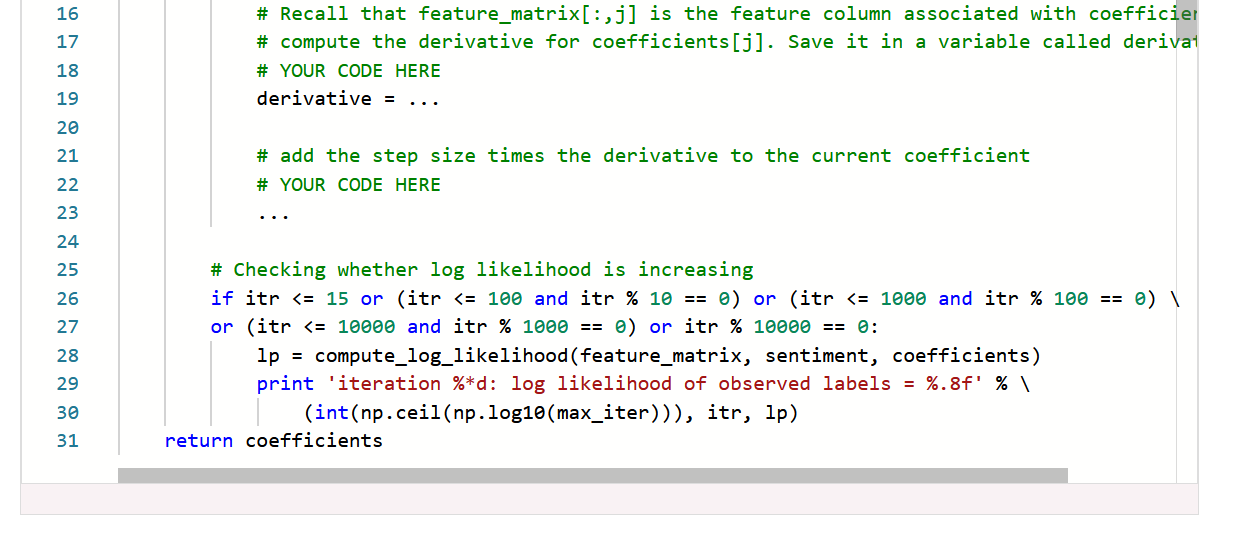

In [41]:
# feature_matrix --> 2D array of features  
# sentiment --> 1D array of class labels
# initial_coefficients --> 1D array containing initial values of coefficients
# step_size --> a parameter controlling the size of the gradient steps
# max_iter --> number of iterations to run gradient ascent

In [43]:
def logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter):

#Initialize vector coefficients to initial_coefficients.
    coefficients = np.array(initial_coefficients)

    for itr in range(max_iter):
        
## Predict the class probability P(yi=+1∣xi,w) using your predict_probability function.
## Save it to variable predictions.
        predictions = predict_probability(feature_matrix , initial_coefficients)
    
## Compute indicator value for (yi=+1) by comparing sentiment against +1. 
## Save it to variable indicator.
        indicator   = sentiment==+1
    
## Compute the errors as difference between indicator and predictions. 
## Save the errors to variable errors.
        errors       = indicator - predictions

## For each j-th coefficient, compute the per-coefficient derivative by calling feature_derivative
## with the j-th column of feature_matrix.Then increment the j-th coefficient by (step_size*derivative).
        for j in range(len(coefficients)):
            derivative      = feature_derivative(errors, feature_matrix[:,j])
            coefficients[j] = coefficients[j] + (step_size * derivative)
            
        # Checking whether log likelihood is increasing
        if (itr <= 15) or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or (itr % 10000 == 0):
            lp = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            print('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients 

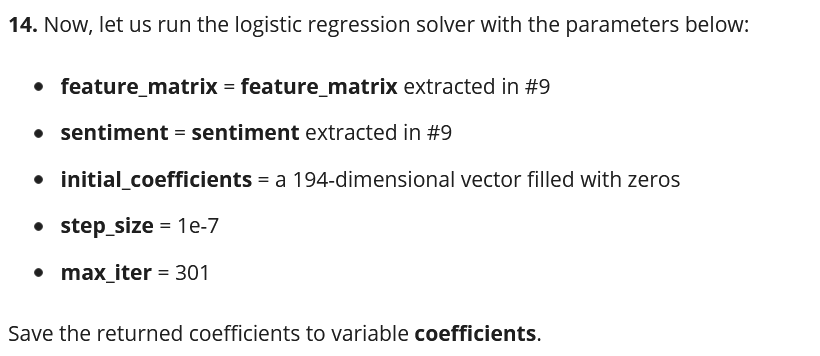

In [44]:
initial_coefficients = np.zeros(194)
step_size = 1e-7
max_iter  = 301

coefficients = logistic_regression(feature_matrix, sentiment, initial_coefficients,
                        step_size, max_iter)

iteration   0: log likelihood of observed labels = -36780.91745462
iteration   1: log likelihood of observed labels = -36775.13081965
iteration   2: log likelihood of observed labels = -36769.34726175
iteration   3: log likelihood of observed labels = -36763.56678092
iteration   4: log likelihood of observed labels = -36757.78937714
iteration   5: log likelihood of observed labels = -36752.01505039
iteration   6: log likelihood of observed labels = -36746.24380064
iteration   7: log likelihood of observed labels = -36740.47562786
iteration   8: log likelihood of observed labels = -36734.71053202
iteration   9: log likelihood of observed labels = -36728.94851308
iteration  10: log likelihood of observed labels = -36723.18957099
iteration  11: log likelihood of observed labels = -36717.43370570
iteration  12: log likelihood of observed labels = -36711.68091717
iteration  13: log likelihood of observed labels = -36705.93120533
iteration  14: log likelihood of observed labels = -36700.1845

In [45]:
print("Coefficients : ")
print(coefficients)

Coefficients : 
[ 0.0012943   0.01398145 -0.01392125  0.06927515  0.06900425  0.0031003
 -0.063812   -0.00639625  0.0674842   0.04679045  0.0041839   0.02027235
  0.03035585 -0.0339829   0.01491455 -0.00130935  0.011438   -0.02225895
 -0.0142373  -0.04745265  0.00136955  0.01768375 -0.0062909   0.0464142
  0.01106175 -0.00031605 -0.0025886   0.0132139   0.0072842  -0.031605
 -0.0008428   0.0148694  -0.01575735 -0.0334712   0.03035585  0.0184814
  0.00239295 -0.01250655 -0.00194145 -0.0119497  -0.0055685   0.00702835
  0.00389795  0.0023478  -0.00257355  0.0092106  -0.00097825 -0.0228459
  0.01795465  0.000602   -0.01961015  0.00916545  0.0114982  -0.0085484
 -0.00732935  0.00594475  0.01073065 -0.00353675  0.0065016   0.00555345
  0.00437955 -0.0065618   0.0061404   0.00907515  0.00076755  0.0055986
  0.0122808  -0.0203175  -0.00799155 -0.01563695 -0.0167657   0.00528255
  0.0052374  -0.00672735  0.0022575   0.0055685   0.0149296  -0.00152005
 -0.03619525 -0.00570395 -0.007525    0.007

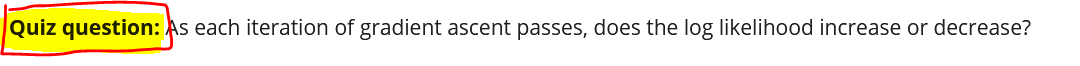

In [48]:
## As each iteration of the gradient ascent passes, log likelihood increases towards positive direction

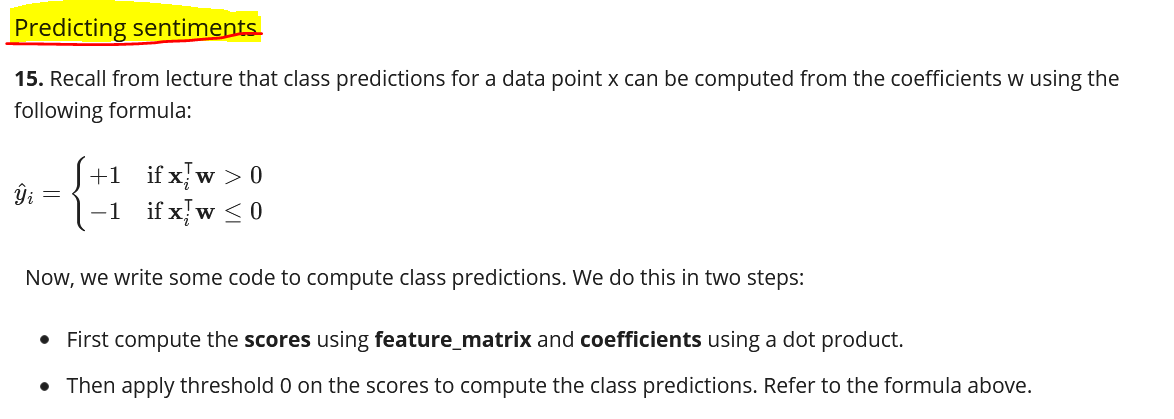

In [46]:
scores = np.dot(feature_matrix , coefficients)

In [49]:
## Applying the threshold to 0
def predict_sentiments(scores):
    if scores>0:
        predict_label = 1
    else:
        predict_label = -1
    return predict_label

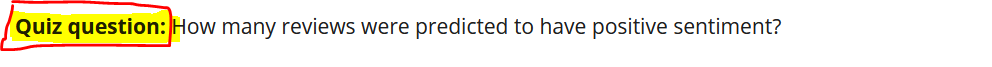

In [50]:
predict_lables = []
for i in range(len(scores)):
    predict_lables.append(predict_sentiments(scores[i]))
    
predict_df = pd.DataFrame({'predicted_labels' : predict_lables})
predict_df.head()

predicted_labels
0                 1
1                -1
2                 1
3                -1
4                 1

In [51]:
print("reviews which is predicted to have positive sentiment : ",
      len(predict_df[predict_df['predicted_labels']==1]))

print("reviews which is predicted to have negative sentiment : ",
      len(predict_df[predict_df['predicted_labels']==-1]))

reviews which is predicted to have positive sentiment :  21345
reviews which is predicted to have negative sentiment :  31727


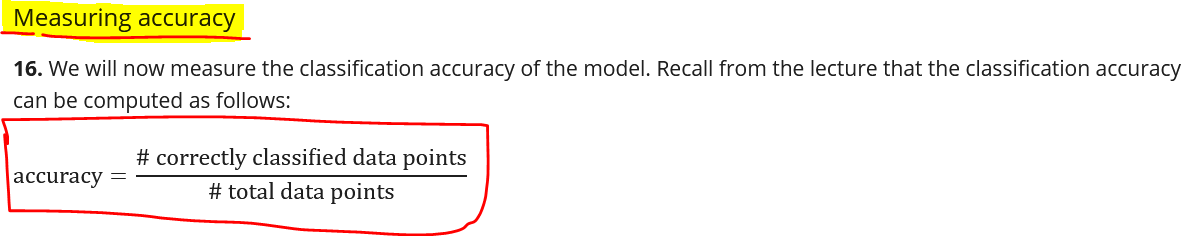

In [52]:
print("Postive predicted : ",len(predict_df[predict_df['predicted_labels']==1]))
print("Positive in the data-set : ",len(products[products['sentiment']== 1]))

Postive predicted :  21345
Positive in the data-set :  26579


In [54]:
correctly_classified_positive_samples = sum(
    (predict_df['predicted_labels'] == 1) == (products['sentiment'] == 1)
)
print("Positive in the prediction as well as in data-set : ",correctly_classified_positive_samples)

Positive in the prediction as well as in data-set :  39330


In [55]:
print("Negative predicted : ",len(predict_df[predict_df['predicted_labels']==-1]))
print("Negative in the data-set : ",len(products[products['sentiment']== -1]))

Negative predicted :  31727
Negative in the data-set :  26493


In [56]:
correctly_classified_negative_samples = sum(
    (predict_df['predicted_labels'] == 1) != (products['sentiment'] == 1)
)
print("Negative in the prediction as well as in data-set : ",correctly_classified_negative_samples)

Negative in the prediction as well as in data-set :  13742


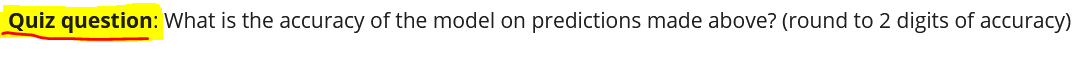

In [57]:
## Positively predicted out of the positive samples in the data-set
print("Positive Accuracy : %.2f " % (
    correctly_classified_positive_samples / len(products['sentiment'])))

Positive Accuracy : 0.74 


In [58]:
## Negatively predicted out of the negative samples in the data-set
print("Negative Accuracy :%.2f " % (
    correctly_classified_negative_samples / len(products['sentiment'])))

Negative Accuracy :0.26 


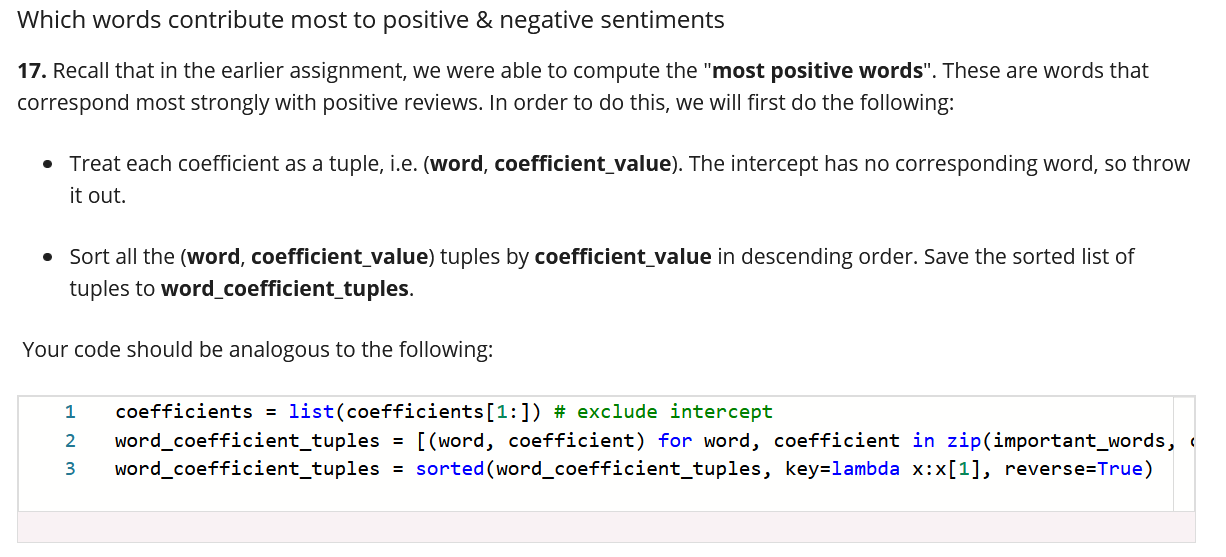

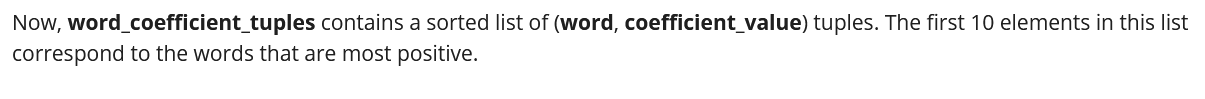

In [59]:
# Excluding the intercept term
coefficients = list(coefficients[1:]) 
word_coefficient_tuples = [(word, coefficient) for word, coefficient in zip(important_words, coefficients)]
word_coefficient_tuples = sorted(word_coefficient_tuples, key=lambda x:x[1], reverse=True)
                                                 ## sorting based on coefficient value

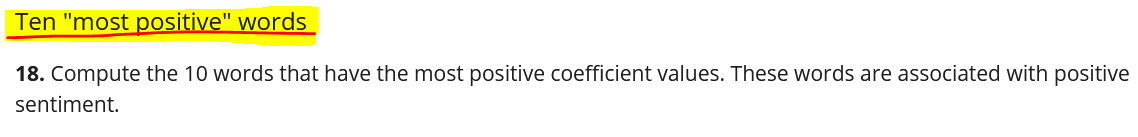

In [60]:
print("10 words that have the most positive coefficient values\n")

for i in range(10):
    print(word_coefficient_tuples[i])

10 words that have the most positive coefficient values

('great', 0.06927514999999965)
('love', 0.06900425000000007)
('easy', 0.06748420000000005)
('little', 0.04679045000000026)
('loves', 0.046414200000000044)
('well', 0.030355849999999917)
('perfect', 0.030355849999999917)
('old', 0.020272350000000126)
('nice', 0.018481399999999922)
('soft', 0.017954649999999985)


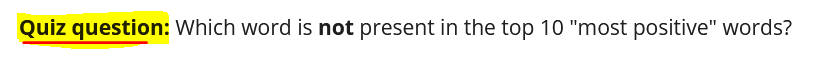

In [61]:
print("Words not present in the top 10 most positive words\n")

for i in range(11,len(word_coefficient_tuples)):
    print(word_coefficient_tuples[i][0])

Words not present in the top 10 most positive words

fits
happy
best
also
recommend
baby
comfortable
car
clean
bit
works
son
stroller
size
play
price
room
easily
kids
lot
still
around
need
take
keep
crib
cute
year
without
set
big
seat
diaper
wish
use
though
babies
seems
bag
enough
every
able
many
makes
pretty
night
toy
long
good
looking
us
think
purchase
since
cover
won
looks
found
put
high
used
chair
go
day
really
bottles
worth
almost
side
hold
using
look
amazon
sure
month
months
find
getting
come
head
small
second
place
together
give
want
wanted
say
took
know
however
fit
purchased
see
came
different
buying
gate
last
much
bottle
less
like
actually
make
new
instead
tub
maybe
started
water
child
right
problem
either
said
went
part
ordered
top
bottom
anything
quality
weeks
design
made
times
picture
away
stay
pump
open
cup
worked
milk
completely
trying
difficult
piece
box
got
try
going
another
two
idea
unit
working
company
received
bad
one
something
bought
never
hard
cheap
thing
first
bro

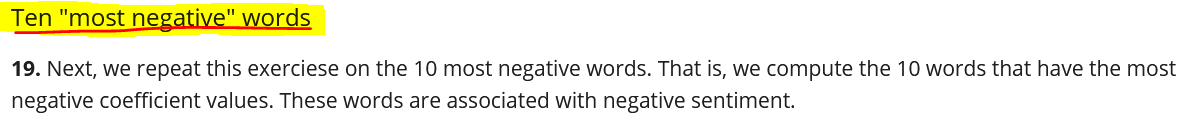

In [62]:
print("10 words that have the most negative coefficient values\n")

for i in range(len(word_coefficient_tuples)-10 , len(word_coefficient_tuples)):
    print(word_coefficient_tuples[i])

10 words that have the most negative coefficient values

('return', -0.027977950000000137)
('monitor', -0.028324099999999935)
('disappointed', -0.03005484999999982)
('back', -0.031605000000000084)
('even', -0.03347119999999984)
('get', -0.03398289999999991)
('work', -0.03619524999999997)
('money', -0.04141760000000029)
('product', -0.047452650000000124)
('would', -0.06381199999999962)


In [63]:
print("Words not present in the top 10 most negative words\n")

for i in range(len(word_coefficient_tuples)-10):
    print(word_coefficient_tuples[i][0])

Words not present in the top 10 most negative words

great
love
easy
little
loves
well
perfect
old
nice
soft
daughter
fits
happy
best
also
recommend
baby
comfortable
car
clean
bit
works
son
stroller
size
play
price
room
easily
kids
lot
still
around
need
take
keep
crib
cute
year
without
set
big
seat
diaper
wish
use
though
babies
seems
bag
enough
every
able
many
makes
pretty
night
toy
long
good
looking
us
think
purchase
since
cover
won
looks
found
put
high
used
chair
go
day
really
bottles
worth
almost
side
hold
using
look
amazon
sure
month
months
find
getting
come
head
small
second
place
together
give
want
wanted
say
took
know
however
fit
purchased
see
came
different
buying
gate
last
much
bottle
less
like
actually
make
new
instead
tub
maybe
started
water
child
right
problem
either
said
went
part
ordered
top
bottom
anything
quality
weeks
design
made
times
picture
away
stay
pump
open
cup
worked
milk
completely
trying
difficult
piece
box
got
try
going
another
two
idea
unit
working
company
r